In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

In [185]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [186]:
train = pd.read_csv('./../input/spaceship-titanic/train.csv')
test = pd.read_csv('./../input/spaceship-titanic/test.csv')

# **Exploratory Data Analysis (EDA)**

## **Train**

In [187]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Сразу заменяем True и False на 0 и 1 для всех признаков и целевой переменной

In [188]:
train['Transported'].replace({True: 1, False: 0}, inplace=True)
train['CryoSleep'].replace({True: 1, False: 0}, inplace=True)
train['VIP'].replace({True: 1, False: 0}, inplace=True)

In [189]:
train.shape

(8693, 14)

Видно, что половина пассажиров моложе 27 лет и не производила траты на услуги спа, фудкорт, VR deck и покупки в магазине

In [190]:
train.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8476.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.479531,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


Видно, что имеется 220 людей с одинаковыми именами, а также то, что более половины людей занимали индивидуальные кабины

In [191]:
train.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8492,8494,8511,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4602,8,5915,2


Видно, что у всех признаков (кроме PassengerId и Transported) имеются NaN-ы

In [192]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Видно, что имеются 3 уникальных планеты отправления и 3 уникальных планеты назначения, которые не пересекаются между собой

In [193]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [194]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

## **Test**

In [195]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Сразу заменяем True и False на 0 и 1 для всех признаков

In [196]:
test['CryoSleep'].replace({True: 1, False: 0}, inplace=True)
test['VIP'].replace({True: 1, False: 0}, inplace=True)

Видно, что тестовая выборка имеет приблизительно в 2 раза меньше записей, а также не имеет label-а, которым является Transported

In [197]:
test.shape

(4277, 13)

In [198]:
test.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4184.000000,4186.000000,4184.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,0.369025,28.658146,0.017686,219.266269,439.484296,177.295525,303.052443,310.710031
std,0.482598,14.179072,0.131825,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,0.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,1.000000,79.000000,1.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


Видно, что в тестовой выборке имеется 7 человек с одинаковыми именами

In [199]:
test.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,4277,4190,4177,4185,4183
unique,4277,3,3265,3,4176
top,0013_01,Earth,G/160/P,TRAPPIST-1e,Cints Erle
freq,1,2263,8,2956,2


Видно, что у всех признаков также (кроме PassengerId и Transported) имеются NaN-ы

In [200]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Видно, что представлены те же пункты отправления и назначения

In [201]:
test['Destination'].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan], dtype=object)

In [202]:
test['HomePlanet'].unique()

array(['Earth', 'Europa', 'Mars', nan], dtype=object)

## **Зависимости**

### **Age**

Видно, что только половина пассажиров была доставлена в пункт назначения

In [203]:
transported = train[train['Transported'] == 1]
not_transported = train [train['Transported'] == 0]

print('Transported: %i (%.1f%%)'%(len(transported), (len(transported))/len(train)*100.0))
print('Not transported: %i (%.1f%%)'%(len(not_transported), (len(not_transported))/len(train)*100.0))

Transported: 4378 (50.4%)
Not transported: 4315 (49.6%)


Видно, что большей части пассажиров было от 18 до 32 лет

<Axes: ylabel='Count'>

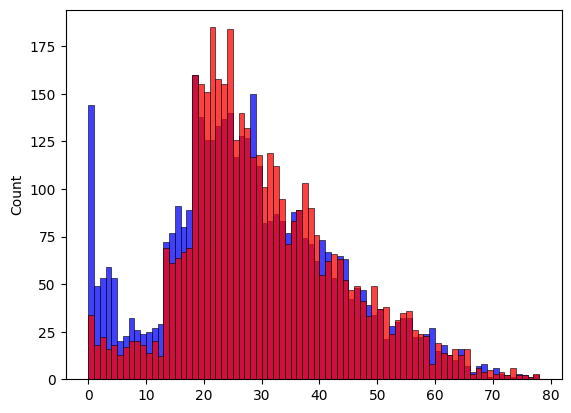

In [204]:
sns.histplot(transported['Age'].dropna().values, bins=range(0, 79, 1), kde=False, color='blue')
sns.histplot(not_transported['Age'].dropna().values, bins=range(0, 79, 1), kde=False, color='red')

### **VIP**

Видно, что среди тех, кто имел VIP статус, меньше успешно прибывших в пункт назначения

In [205]:
train.groupby('VIP')['Transported'].value_counts()

VIP  Transported
0.0  1              4198
     0              4093
1.0  0               123
     1                76
Name: count, dtype: int64

In [206]:
train[['VIP', 'Transported']].groupby('VIP', as_index = False).mean()

,VIP,Transported
0,0.0,0.506332
1,1.0,0.381910


<Axes: xlabel='VIP', ylabel='Transported'>

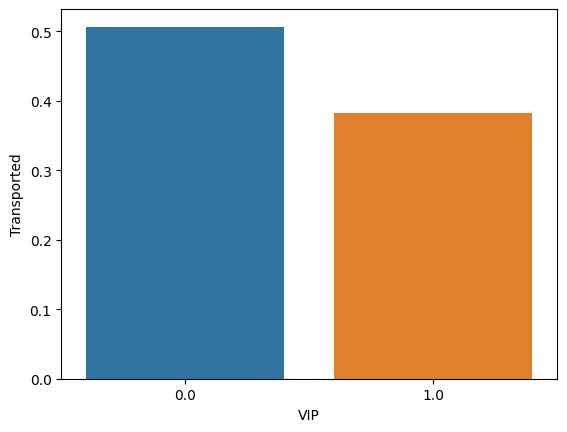

In [207]:
sns.barplot(x='VIP', y='Transported', data=train, ci=None)

Видно, что эту разницу в основном составляют люди от 40 до 60 лет

<Axes: xlabel='VIP', ylabel='Age'>

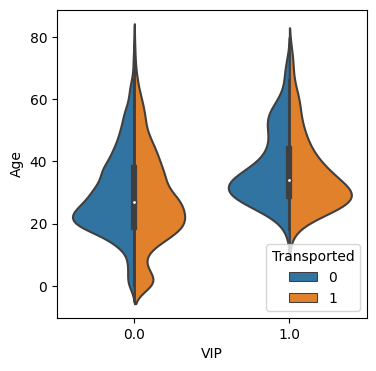

In [208]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

sns.violinplot(x="VIP", y='Age', hue='Transported', data=train, split=True, ax=ax)

### **CryoSleep**

Видно, что среди тех, кто не прибывал в криосне, меньше успешно прибывших в пункт назначения. Среди тех, кто в нем прибывал, напротив, успешно прибывших значительно больше 

In [209]:
train.groupby('CryoSleep')['Transported'].value_counts()

CryoSleep  Transported
0.0        0              3650
           1              1789
1.0        1              2483
           0               554
Name: count, dtype: int64

In [210]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep', as_index = False).mean()

,CryoSleep,Transported
0,0.0,0.328921
1,1.0,0.817583


<Axes: xlabel='CryoSleep', ylabel='Transported'>

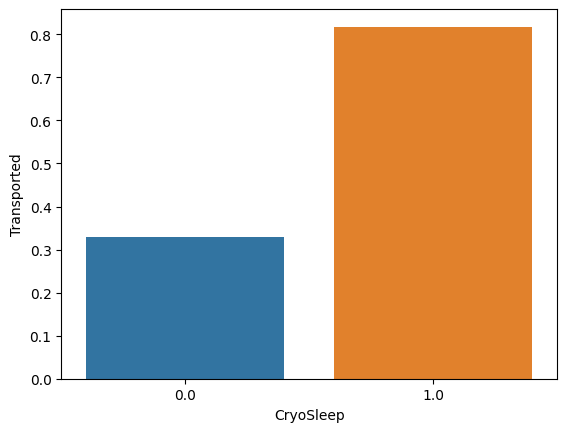

In [211]:
sns.barplot(x='CryoSleep', y='Transported', data=train, ci=None)

### **HomePlanet**

Видно, что среди пассажиров, отправленных с планеты Europa, значительно больше успешно прибывших в пункт назначения. С планеты Earth, напротив, успешно прибывших меньше

In [212]:
train.groupby('HomePlanet')['Transported'].value_counts()

HomePlanet  Transported
Earth       0              2651
            1              1951
Europa      1              1404
            0               727
Mars        1               920
            0               839
Name: count, dtype: int64

In [213]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index = False).mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


<Axes: xlabel='HomePlanet', ylabel='Transported'>

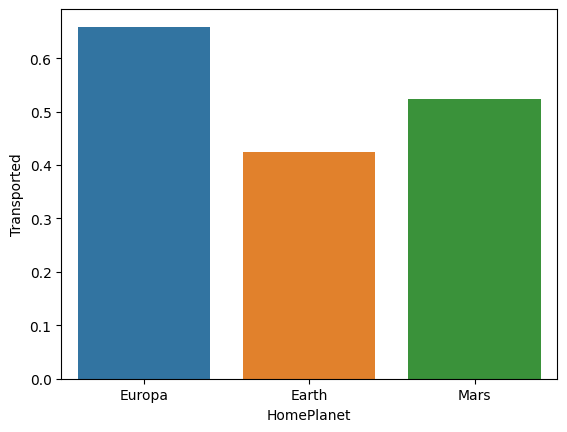

In [214]:
sns.barplot(x='HomePlanet', y='Transported', data=train, ci=None)

Видно, что пассажиры с Марса, которым менее 14 лет, благополучно добрались до пункта назначения

<Axes: xlabel='HomePlanet', ylabel='Age'>

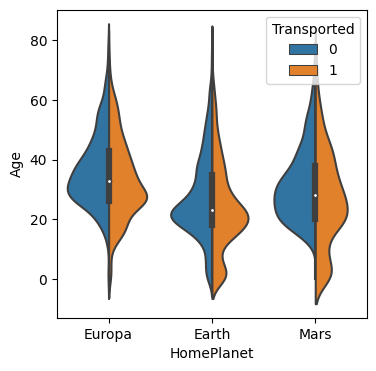

In [215]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

sns.violinplot(x='HomePlanet', y='Age', hue='Transported', data=train, split=True, ax=ax)

### **Destination**

Видно, что среди пассажиров, отправляющихся в 55 Cancri e, больше успешно прибывших в пункт назначения. 

In [216]:
train.groupby('Destination')['Transported'].value_counts()

Destination    Transported
55 Cancri e    1              1098
               0               702
PSO J318.5-22  1               401
               0               395
TRAPPIST-1e    0              3128
               1              2787
Name: count, dtype: int64

In [217]:
train[['Destination', 'Transported']].groupby('Destination', as_index = False).mean()

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


<Axes: xlabel='Destination', ylabel='Transported'>

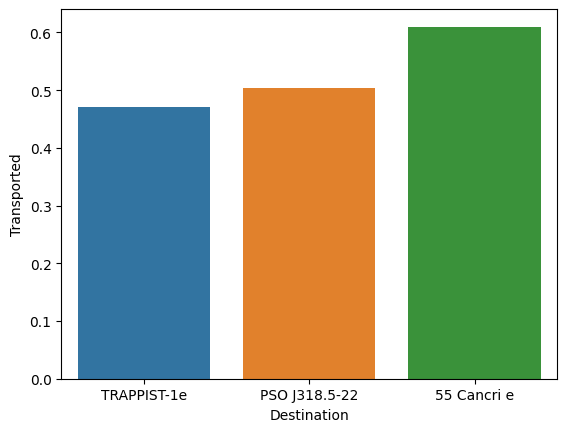

In [218]:
sns.barplot(x='Destination', y='Transported', data=train, ci=None)

## **Матрица корреляции и диаграмма рессеяиния**

Из матрицы корреляции видно, что с целевой переменной сильно коррелирует признак CryoSleep. Признак RoomSerivce коррелирует с признаком HomePlanet. Также видно, что с признаком FoodCourt коррелируют признаки Spa и VRDeck.

<Axes: >

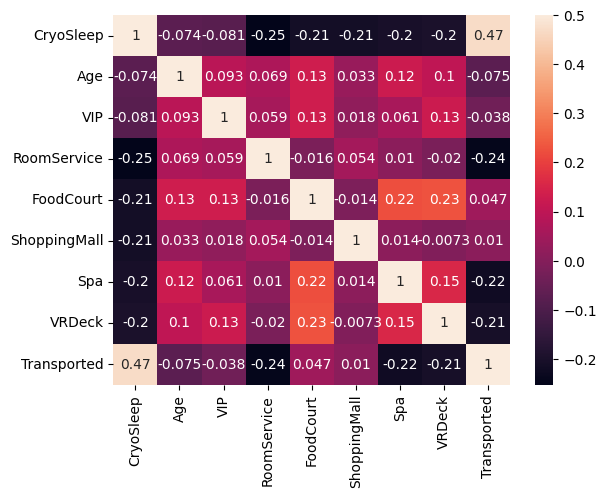

In [219]:
num_df = train.select_dtypes(exclude=['object'])
sns.heatmap(num_df.corr(), vmax=0.5, annot=True)

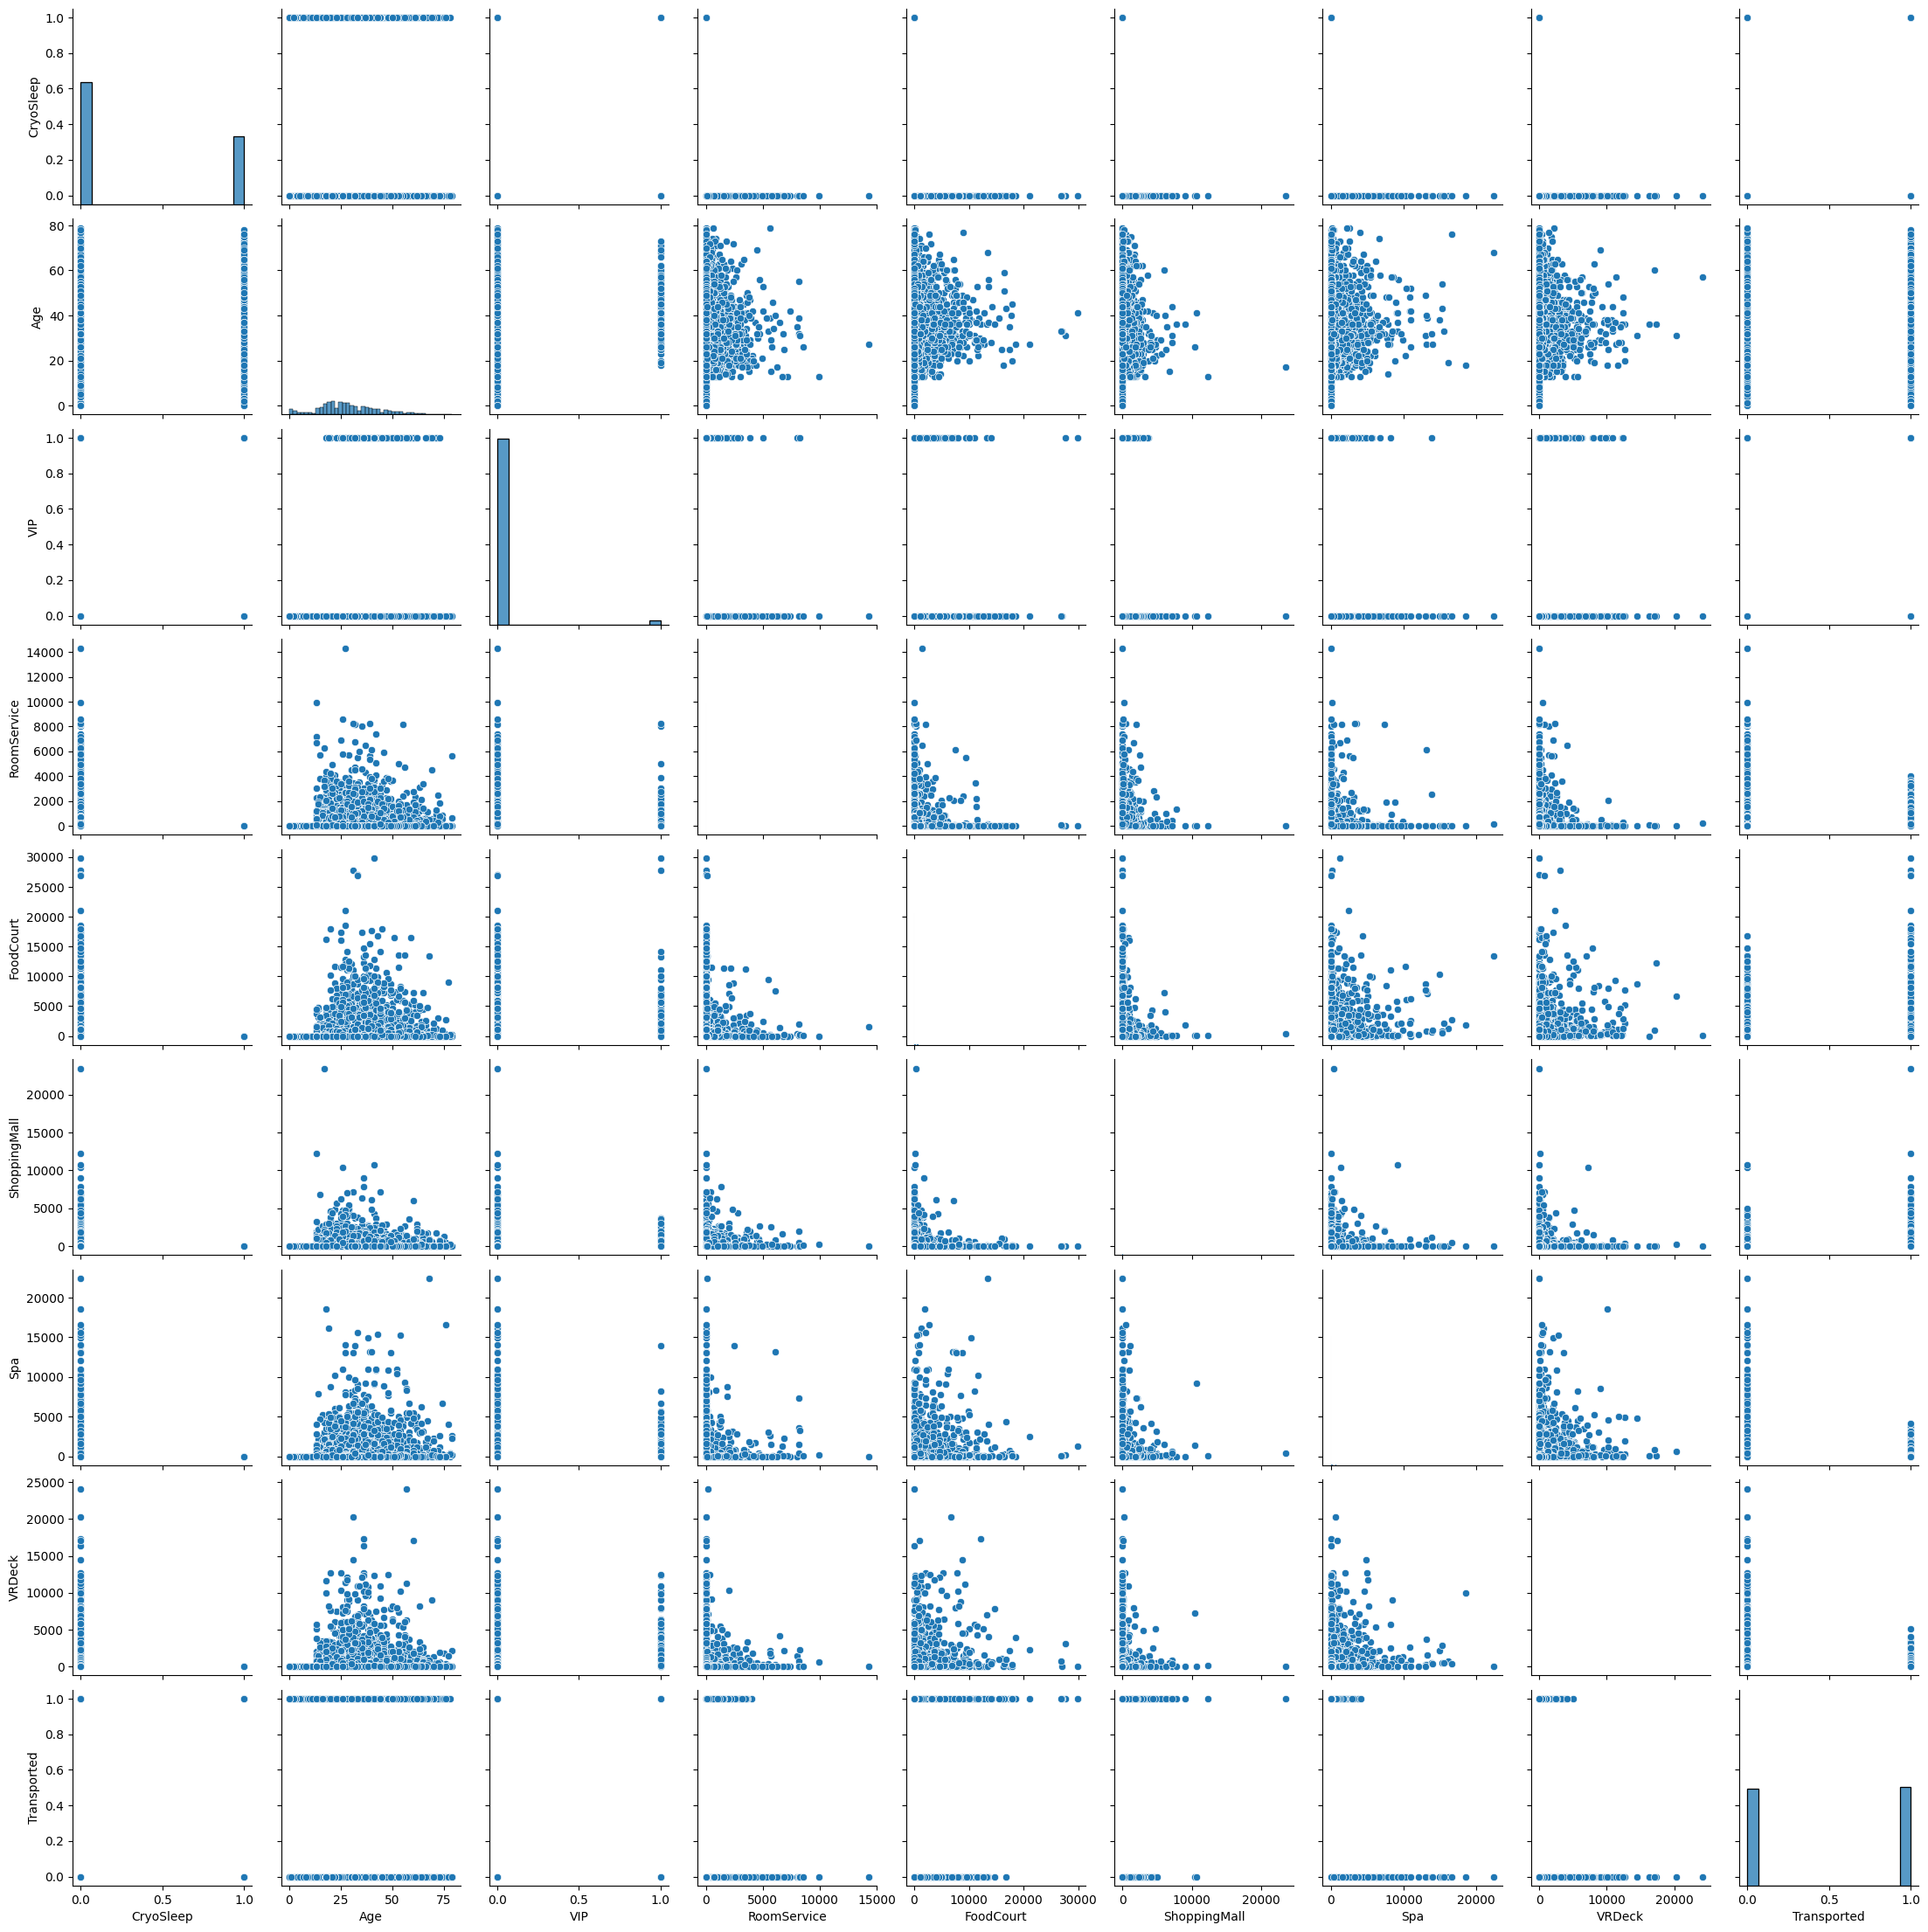

In [220]:
sns.pairplot(train)

# **Feature Engineering (FE)**

## **NaN**

Определяем функцию для нахождения полей в наборе данных, которые имеют почти константные значения (от 95%)

In [221]:
def get_almost_constant_columns(df):
    cols = []
    for i in df:
        counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 95:
            cols.append(i)
    return cols

Видно, что для числовых значений было удалено поле VIP

In [222]:
#num_df = train.select_dtypes(exclude=['object'])
#overfit_num = get_almost_constant_columns(num_df)
#train.drop(overfit_num, axis=1, inplace=True)
#test.drop(overfit_num, axis=1, inplace=True)
#overfit_num

Видно, что для категориальных значений почти константные значения отсутствуют, что было видно из train.describe(include=['O'])

In [223]:
cat_df = train.select_dtypes(include=['object'])
overfit_cat = get_almost_constant_columns(cat_df)
train.drop(overfit_cat, axis=1, inplace=True)
test.drop(overfit_cat, axis=1, inplace=True)
overfit_cat

[]

Заполняем NaN-ы в числовых признаках их средним

In [224]:
train['VIP'] = train['VIP'].fillna(0)
num_df = train.select_dtypes(exclude=['object'])
num_сols_with_missing = [col for col in num_df.columns 
                         if num_df[col].isnull().any()]
train[num_сols_with_missing] = train[num_сols_with_missing].fillna(train[num_сols_with_missing].mean())

test['VIP'] = test['VIP'].fillna(0)
num_df = test.select_dtypes(exclude=['object'])
num_сols_with_missing = [col for col in num_df.columns 
                         if num_df[col].isnull().any()]
test[num_сols_with_missing] = test[num_сols_with_missing].fillna(test[num_сols_with_missing].mean())

Заполняем NaN-ы в категориальных признаках их модой

In [225]:
cols = ['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']
train[cols] = train[cols].transform(lambda x: x.fillna(x.dropna().mode()[0]))
test[cols] = test[cols].transform(lambda x: x.fillna(x.dropna().mode()[0]))

Видно, что не осталось NaN значений в наборах данных

In [226]:
train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [227]:
test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

Заменяем True и False на 1 и 0 в целевой переменной и признаках

In [228]:
train['Transported'] = train['Transported'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)

test['CryoSleep'] = train['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)

In [229]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


## **Выбросы**

Видно, что выбросы присутствуют в признаках RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

<Axes: >

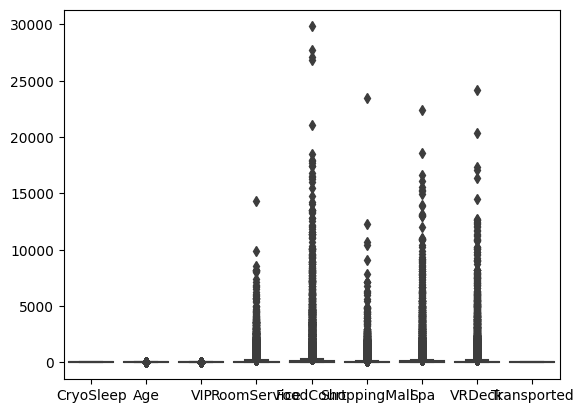

In [230]:
sns.boxplot(data=train)

Определяем функцию, удаляющую значения, которые не входят в промежуток между 1 и 3 квантилем

In [231]:
def del_outliers(col):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

    median_distance_after_removal = np.median(filtered_data[col])

    train.loc[train[col] < lower_bound, col] = median_distance_after_removal
    train.loc[train[col] > upper_bound, col] = median_distance_after_removal

Вызываем определенную функцию для признаков RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [232]:
#cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
#for col in cols:
    #del_outliers(col)

<Axes: >

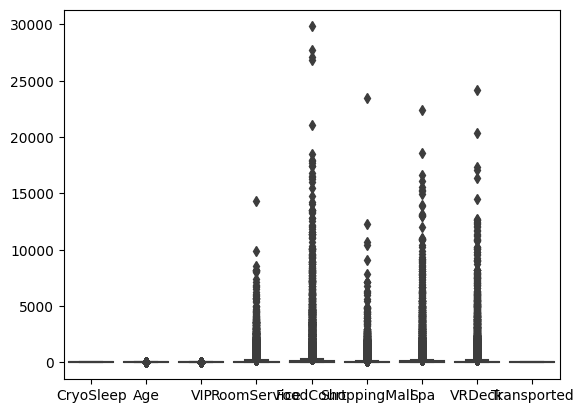

In [233]:
sns.boxplot(data=train)

## **New Features**

### **TotalWastes**

Добавляем признак, который представляет сумму  затрат пассажира на дополнительные услуги под названием TotalWastes

In [234]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['TotalWastes'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train.drop(cols, axis=1, inplace=True)
train

test['TotalWastes'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
test.drop(cols, axis=1, inplace=True)

### **CrewSize**

Добавляем признак под названием CrewSize, отвечающий за то, сколько пассажиров находятся в одной комнате

In [235]:
crew_size = train['Cabin'].value_counts()
train['CrewSize'] = train['Cabin'].map(crew_size)

crew_size = test['Cabin'].value_counts()
test['CrewSize'] = test['Cabin'].map(crew_size)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,TotalWastes,CrewSize
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,Maham Ofracculy,0,0.0,1
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,Juanna Vines,1,736.0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,Altark Susent,0,10383.0,2
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,Solam Susent,0,5176.0,2
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,Willy Santantines,1,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,Gravior Noxnuther,0,8536.0,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,Kurta Mondalley,0,0.0,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,Fayey Connon,1,1873.0,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,Celeon Hontichre,0,4637.0,2


## **Удаление дубликатов**

Удаляем дубликаты из наборов данных

In [236]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

## **Feature Importances**

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def feature_importances(df):
    df = pd.get_dummies(data=df, columns=['HomePlanet', 'Cabin'], drop_first=True)

    # Определяем X и y
    X = df.drop('Transported', axis=1)
    y = df['Transported']

    le_transported = LabelEncoder()
    y = le_transported.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Логистическая регрессия
    clf_lr = LogisticRegression(random_state=0, max_iter=1000)
    clf_lr.fit(X_train, y_train)
    coef_lr = clf_lr.coef_[0]

    acc_train_lr = accuracy_score(y_true=y_train, y_pred=clf_lr.predict(X_train))
    acc_test_lr = accuracy_score(y_true=y_test, y_pred=clf_lr.predict(X_test))
    label_lr = f'Importance (LR abs), acc_train = {acc_train_lr:.2%}, acc_test = {acc_test_lr:.2%}'

    # Random Forest
    clf_rf = RandomForestClassifier(random_state=0)
    clf_rf.fit(X_train, y_train)
    coef_rf = clf_rf.feature_importances_

    acc_train_rf = accuracy_score(y_true=y_train, y_pred=clf_rf.predict(X_train))
    acc_test_rf = accuracy_score(y_true=y_test, y_pred=clf_rf.predict(X_test))
    label_rf = f'Importance (RF), acc_train = {acc_train_rf:.2%}, acc_test = {acc_test_rf:.2%}'

    # CatBoost
    clf_cat = CatBoostClassifier(random_state=0, silent=True)
    clf_cat.fit(X_train, y_train)
    coef_cat = clf_cat.feature_importances_

    acc_train_cat = accuracy_score(y_true=y_train, y_pred=clf_cat.predict(X_train).astype('bool'))
    acc_test_cat = accuracy_score(y_true=y_test, y_pred=clf_cat.predict(X_test).astype('bool'))
    label_cat = f'Importance (CatBoost), acc_train = {acc_train_cat:.2%}, acc_test = {acc_test_cat:.2%}'

    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'LR': np.abs(coef_lr),
        'RF': coef_rf,
        'CatBoost': coef_cat
    })

    # Суммируем важность по исходным категориальным переменным
    feature_importances['Category'] = feature_importances['Feature'].str.split('_').str[0]
    grouped_importances = feature_importances.groupby('Category').sum().reset_index()

    # Сортируем по важности
    grouped_importances = grouped_importances.sort_values(by='CatBoost', ascending=False)

    # Масштабируем важность
    scaler = MaxAbsScaler()
    grouped_importances[['LR', 'RF', 'CatBoost']] = scaler.fit_transform(grouped_importances[['LR', 'RF', 'CatBoost']])

    grouped_importances.plot(kind='bar', x='Category', figsize=(10, 6))
    plt.title('Feature Importance by Category')
    plt.ylabel('Normalized Importance')
    plt.show()
    return ([acc_train_lr, acc_train_rf, acc_train_cat], [acc_test_lr, acc_test_rf, acc_test_cat])

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MaxAbsScaler
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

from sklearn.utils.extmath import softmax

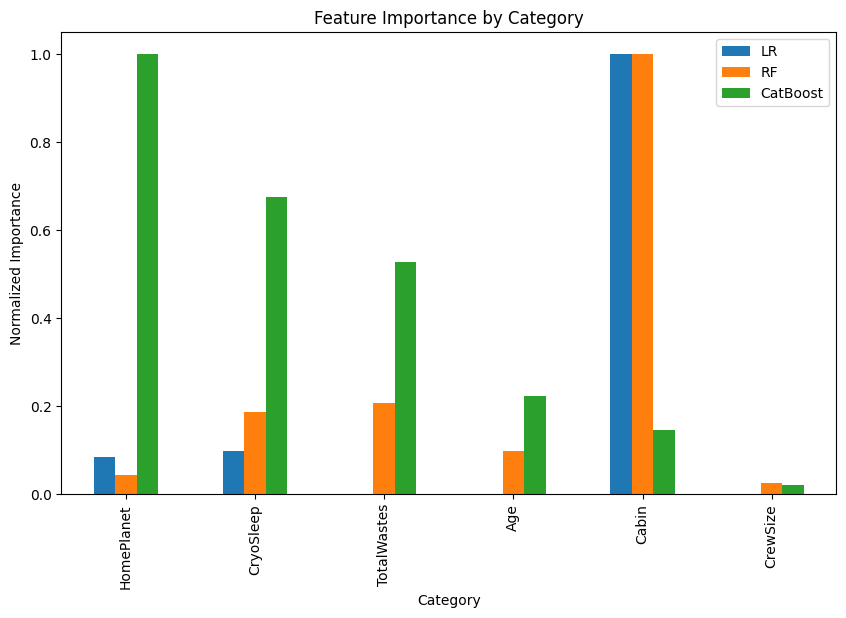

In [239]:
train2 = train[['CryoSleep', 'Age', 'TotalWastes', 'CrewSize', 'Transported', 'HomePlanet', 'Cabin']]
acc_train, acc_test = feature_importances(train2)

<Axes: >

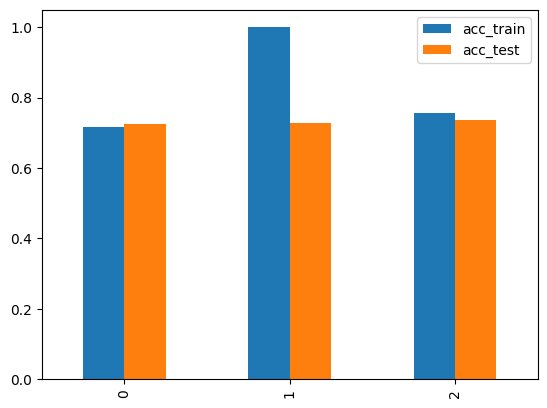

In [240]:
d = {
    'acc_train': acc_train,
    'acc_test': acc_test
}

acc_df = pd.DataFrame(d)
acc_df.plot.bar()

## **Матрица корреляции после Feature Engineering**

<Axes: >

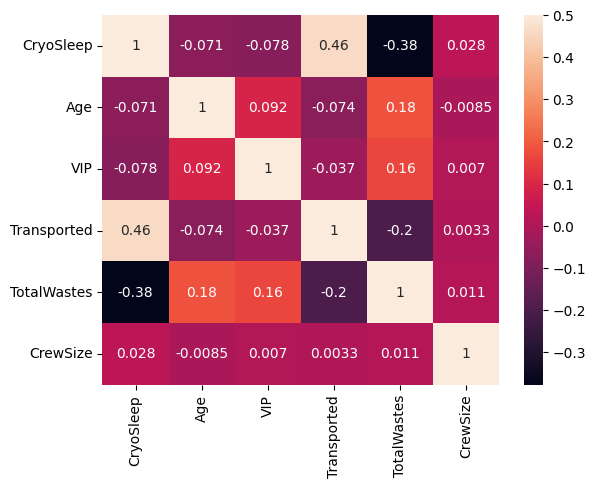

In [242]:
num_df = train.select_dtypes(exclude=['object'])
sns.heatmap(num_df.corr(), vmax=0.5, annot=True)

Таким образом, были проведены Exploratory Data Analysis и Feature Engineering